In [39]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from tqdm import tqdm

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn.preprocessing import StandardScaler

In [46]:
from tqdm.notebook import trange, tqdm

c=0
for i in trange(1100000, desc='1st loop'):
    c += 1

1st loop:   0%|          | 0/1100000 [00:00<?, ?it/s]

In [48]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []

    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])

        w = np.zeros(X.shape[1])

        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):

                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]
                w = new_w.copy()

                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X.dot(w)))

        self.w_ = self.weights_[np.argmin(self.mse_)]

        return self

    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])

        return X.dot(self.w_)

In [49]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [50]:
data_demo = pd.read_csv(DATA_PATH + "weights_heights.csv")

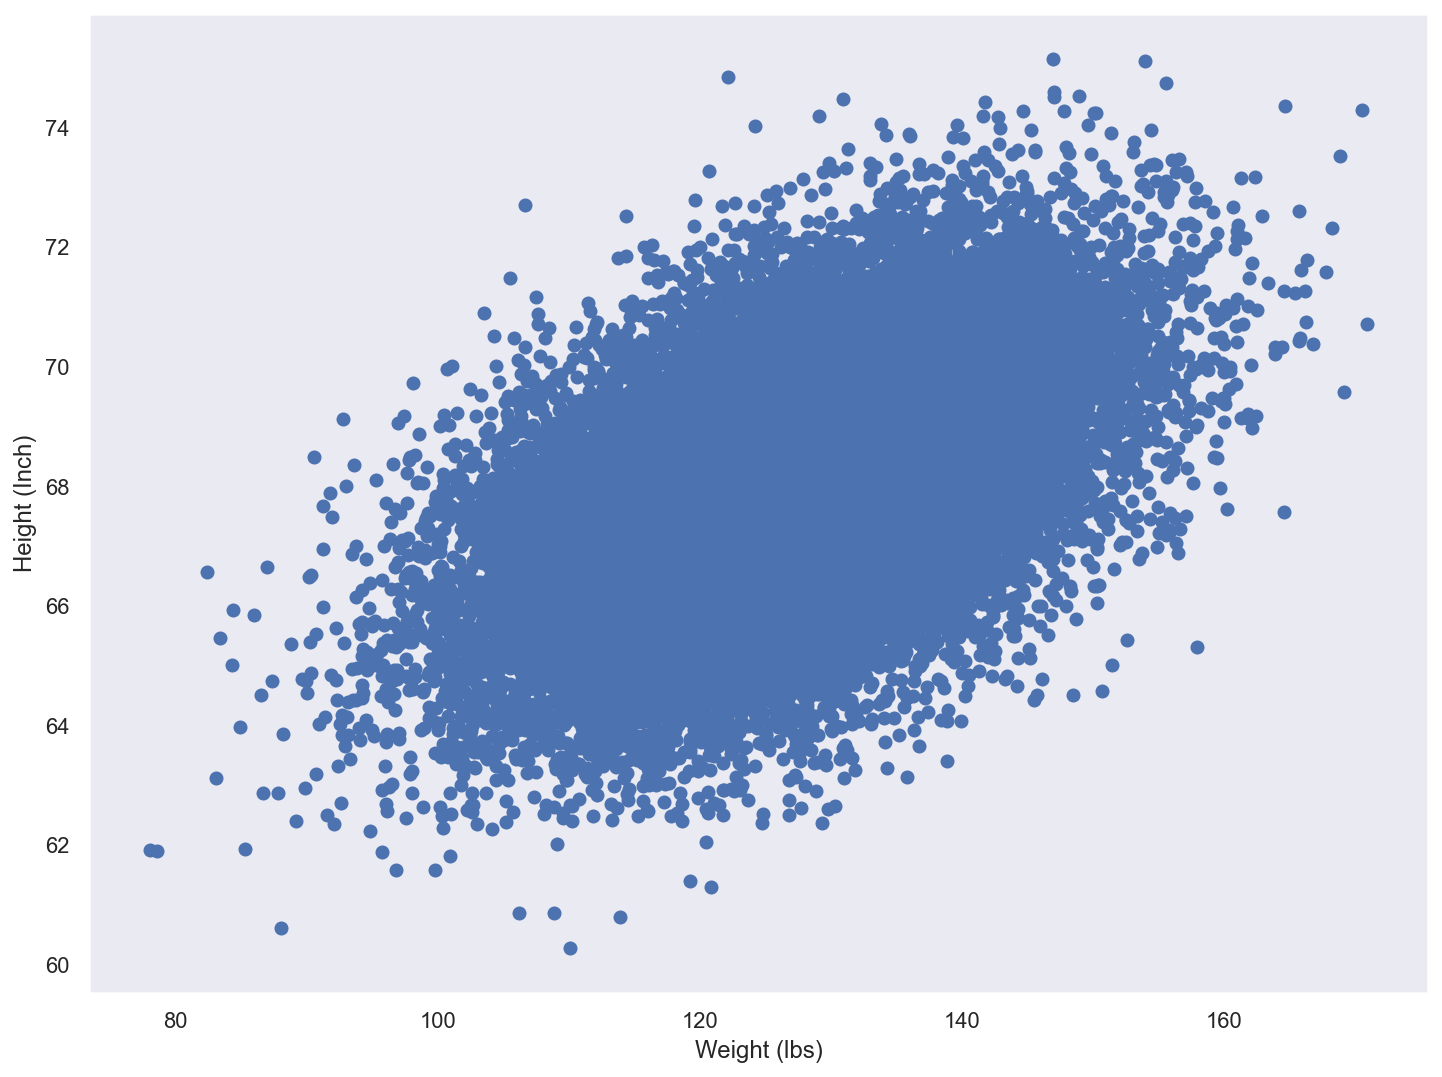

In [51]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)")
plt.grid();

In [52]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

In [55]:
# you code here
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)

  0%|          | 0/3 [00:00<?, ?it/s]

SGDRegressor()

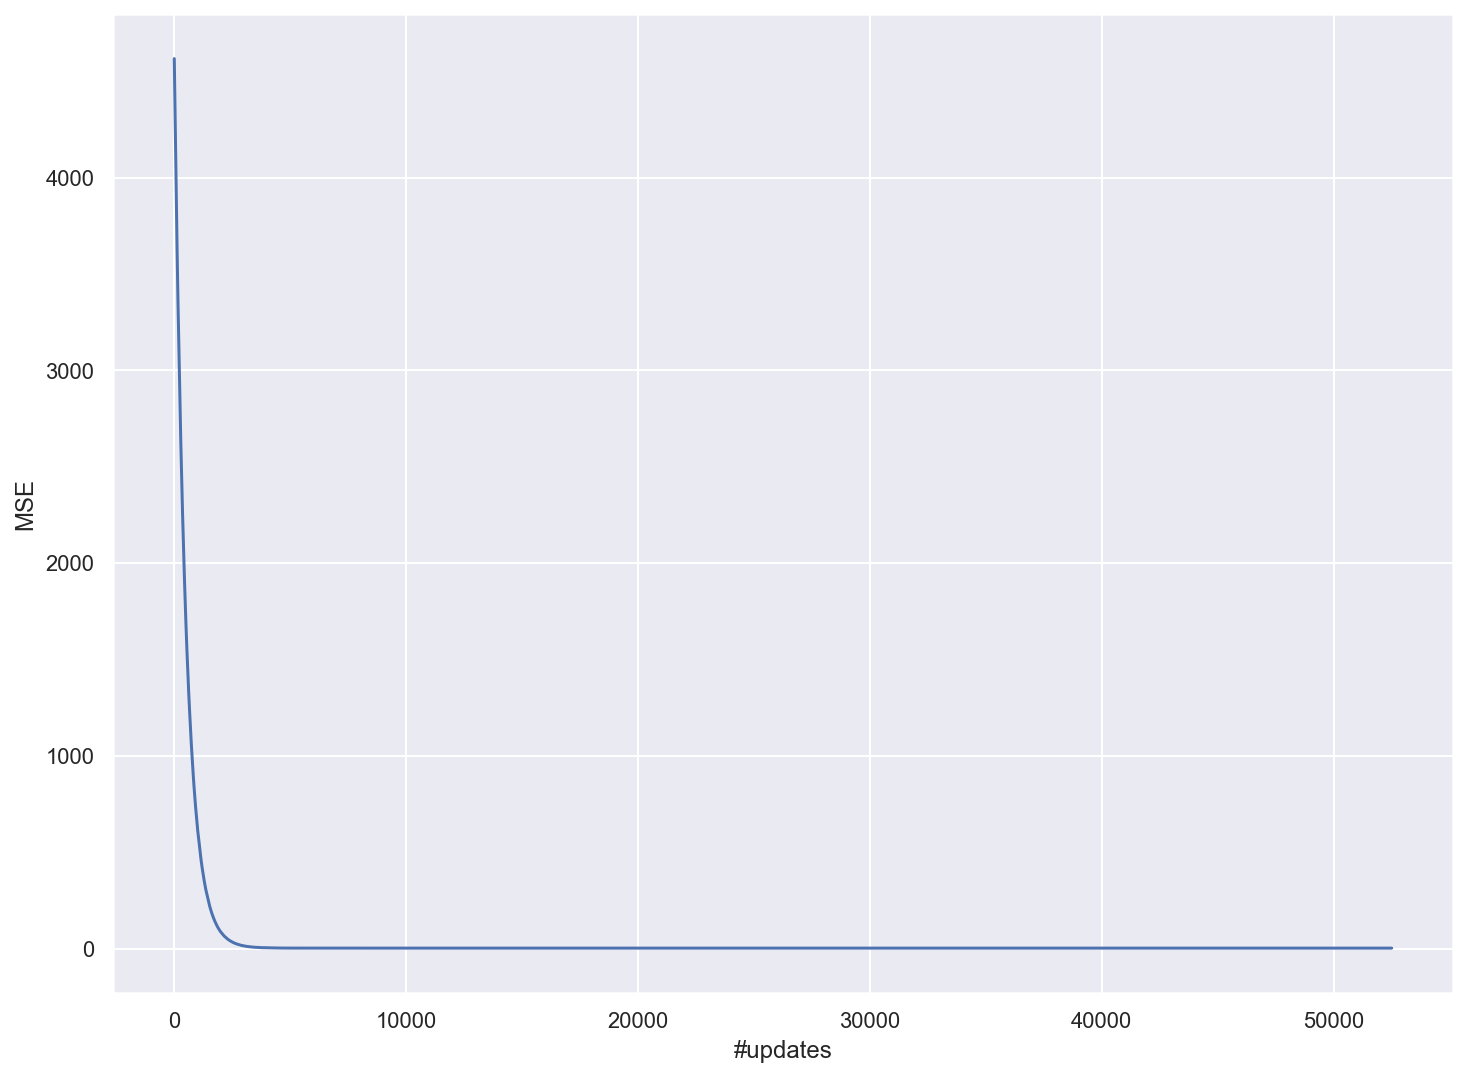

In [56]:
# you code here
plt.plot(range(len(sgd_reg.mse_)), sgd_reg.mse_)
plt.xlabel("#updates")
plt.ylabel("MSE");

In [64]:
mean_absolute_percentage_error(y_valid, sgd_reg.predict(X_valid_scaled))

0.01917862512281104

In [59]:
y_valid.shape

(7500,)

In [60]:
X_valid.shape

(7500,)

In [86]:
mean_squared_error(y_valid, X_valid_scaled)

4624.7520406355

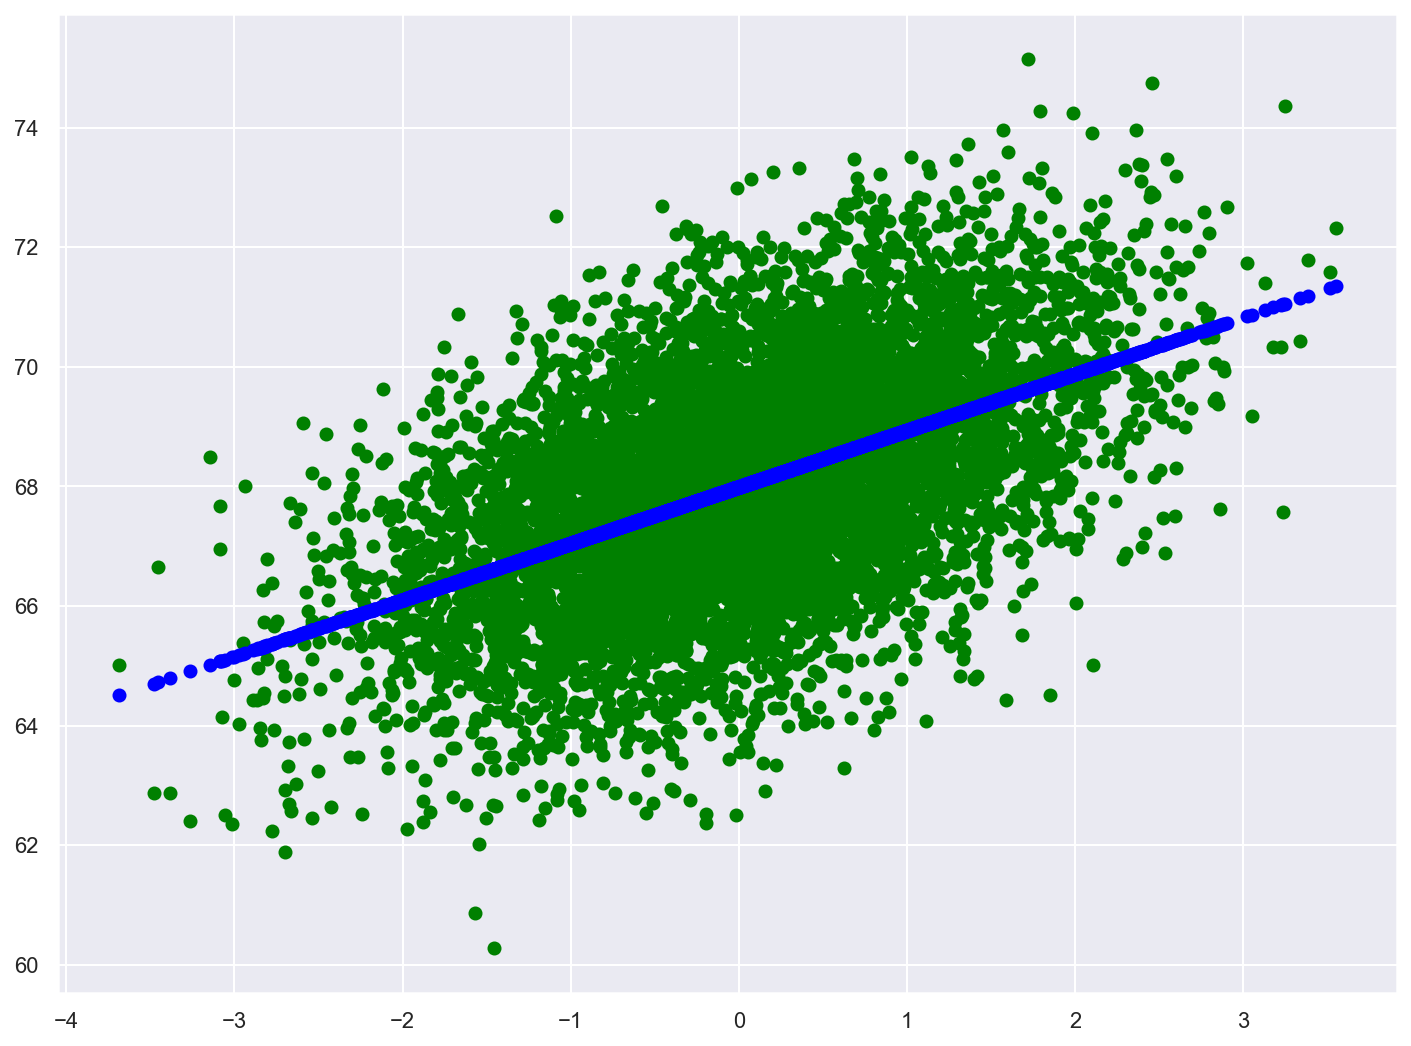

In [91]:
plt.scatter(X_valid_scaled, y_valid, c='green')
plt.scatter(X_valid_scaled, sgd_reg.predict(X_valid_scaled), c='blue')

In [83]:
new = abs(sgd_reg.predict(X_valid_scaled).reshape(-1,1) - X_valid_scaled.reshape(-1,1))

In [84]:
new.shape

(7500, 1)

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vect= TfidfVectorizer(  use_idf=True, smooth_idf=True, sublinear_tf=False)
from sklearn.model_selection import train_test_split

df= pd.DataFrame({'text':['cat on the','angel eyes has','blue red angel','one two blue','blue whales eat','hot tin roof','angel eyes has','have a cat']\
              ,'class': [0,0,0,1,1,1,0,3]})
df

In [ ]:
X = tfidf_vect.fit_transform(df['text'])

In [ ]:
from sklearn.decomposition import TruncatedSVD        
pca = TruncatedSVD(n_components=2)                                
X_reduced_train = pca.fit_transform(X)  
X_reduced_train

In [ ]:
pca.explained_variance_ratio_

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
classifier=RandomForestClassifier(n_estimators=10)                  
classifier.fit(a_train.toarray(), b_train)     

In [ ]:
from sklearn.metrics import accuracy_score                
accuracy_score(b_test, classifier.predict(a_test.toarray()) )